<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP5_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practico TP5 (Transformada de Fourier y procesamiento espectral)
El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:

    Cargar una imagen
    Generar la TF directa de la imagen y ver su espectro
    A partir del espectro generado mediante la TF inversa obtener la imagen
    Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
    Debe permitir cargar el espectro de imagen a partir de un bitmap

Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes)
Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.
Nota: se sugiere usar los widgets tipo botón para ejecutar las operaciones mencionadas y que el aplicativo interactivo tengas todas las funciones en el mismo entorno.
Por favor revisar cuidadosamente los videos de la teoría donde se explica cuidadosamente todas las características que se desea tenga el aplicativo.

In [6]:
#importo material de trabajo
!git clone https://github.com/juangross/cursoPDI2021



Cloning into 'cursoPDI2021'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 160 (delta 46), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (160/160), 31.43 MiB | 11.21 MiB/s, done.
Resolving deltas: 100% (46/46), done.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


leyendo archivo: ./cursoPDI2021/imagenes/circulo_50p.png (500, 500, 3)


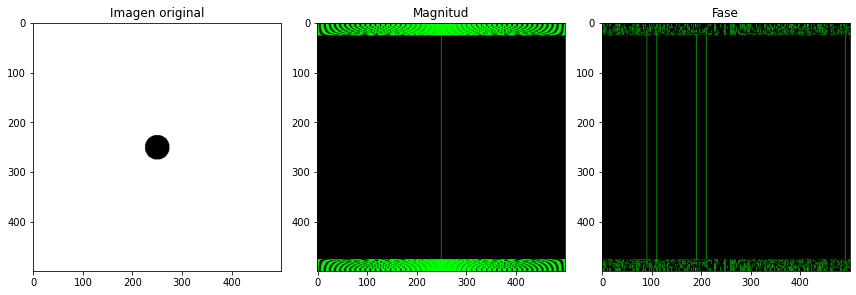

In [27]:
import imageio as img
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

#Procurar buscar imágenes que tengan el mismo tamaño
archi = "circulo_50p" #@param [ "cuadrado_1p", "cuadrado_5x5p", "cuadrado_10x10p", "circulo_20p", "circulo_50p","milo5r","milo4r"]

#cargo imágenes de prueba
# Import an image from directory:
path="./cursoPDI2021/imagenes/"
ext="png"


#Lee imagen con el formato actual
Img1=img.imread(f"{path}{archi}.{ext}")      #lee con imageio
Img1=Img1.astype('float')/255 #normalizo
Img1=np.clip(Img1,0.,1.)  #recorto los valores extremos al rango [0:1] 
print("leyendo archivo:", f"{path}{archi}.{ext}", Img1.shape)




fc = np.fft.fftshift(np.fft.fft2(Img1)) #numpy  



mag = np.abs(fc)
phase = np.angle(fc)
#print(fc.shape)
#print(fc)

#figura base
fig, axs = plt.subplots(1, 3, tight_layout=True,figsize=(12, 12))

axs[0].imshow( Img1,'gray')
axs[0].set_title("Imagen original")

#según claudio
# Coef BMP <- round( 32 * log( coef TF ) )
axs[1].imshow(np.log(mag),'gray')
axs[1].set_title("Magnitud")

axs[2].imshow(phase.astype('uint8'),'gray')
axs[2].set_title("Fase")

plt.show()
